### Rozložení náhodných proměnných

**Klíčové pojmy**:
* náhodná proměnná
* kvantily
* z-skor
* uniformní rozdělení
* binomické rozdělení
* normální rozdělení
* distribuční funkce



Náhodná proměnná je taková proměnná, jejíž hodnoty byly generovány náhodným procesem. Jako náhodný proces můžeme spoustu věcí:
* náhodnost při výběru pozorování (např. náhodný výběr respondentů)
* nepřesnost měření (např. zmáčknutí stopek při měření rychlosti běhu) 
* náhodou při každém pokusu (např. směr chůze opilého člověka)

Z definice může náhodná proměnná nabývat různých hodnot (jevů). Souhrn těchto různých hodnoty nazýváme rozdělení pravděpodobnosti proměnné. Toto rozdělení nám řekne, s jakou pravděpodobností daný jevy nastane. Typ tohoto pravděpodobnostního rozložení záleží na procesu, který proměnnou vytváří i na typu proměnné. 


Process > Rozdělení pravděpodobnosti


Znalost rozdělení pravděpodobnosti proměnné je velmi užiteční věc, protože nám dokáže pomoci předpovídat hodnoty dané proměnné. Ukažme si teď příklad takového rozložení na hodu kostkou. Řekněme, že naše proměnná bude mít 100 pozorování (100 hodů kostkou).

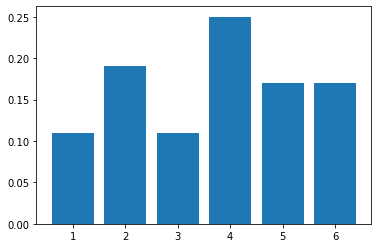

In [18]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

kostka = np.arange(1,7)
n = 100
hody = np.random.choice(kostka, size=n, replace=True)
hody_rel = pd.value_counts(hody) / n

plt.bar(hody_rel.index, hody_rel)
plt.show()

Relativní četnost jednotlivých jevů (hodnot, čísel na kostce) nám řekne pravděpodobnost, s jakou daný jev nastane. Například číslo 1 padlo v našem příkladu v 10% případů. Jak si ale pamatujete ze zimního semestru, relativní četnost se pravděpodobnosti přibližuje pouze pokud počet pokusů je velmi vysoký. Co když ale nemůžeme nasbírat velký počet pozorování (pokusů)? Naštěstí existují učité skupiny rozdělení, které nám pravděpodobnosti vyjádří jako funkci. Asi bychom dovedli odhadnout, že náš výsledek uvedený nahoře neodpovídá tomu, jaké hodnoty bychom při hodu kostkou očekávali. Všechny možnosti (tedy 1,2,3,...,6) mají stejnou pravděpodobnost, že padnou. Takovému rozdělení říkáme **uniformní**. Uniformní rozdělení je generováno procesem, který předpokládá, že všechny hodnoty (jevy) proměnné budou stejně reprezentované (tedy, že budou mít stejnou pravděpodobnost realizace). Pokud proměnná $x$ pochází z uniformního rozložení, pak platí, že $x \sim unif(a,b)$. Uniformní rozložení je tedy možná vyjádřit pomocí dvou parametrů $a$ a $b$, které vyjadřují minimální a maximální možné hodnoty proměnné. Funkci rozdělení pravděpodobnosti uniformního rozložení (Probability mass function) pro spojitou proměnnou pak můžeme vyjádřit jako: 

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b701524dbfea89ed90316dbc48c5b62954d7411c)


Každé takto specifikované rozdělení pravděpodobnosti má definovaný svůj průměr, rozptyl. Průměr uniformního rozdělení lze vypočítat jako $\frac{1}{2}(a+b)$ a jeho rozptyl jako $\frac{1}{12}(b-a)^2$

V praxi nabývá uniformního rozložení například sériová čísla při výrobě [zajímavé využití zde](https://en.wikipedia.org/wiki/German_tank_problem) nebo čekání na tramvaj. Ukažme si příklad 

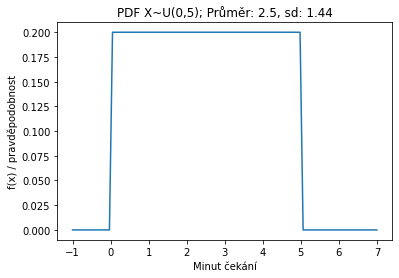

In [50]:
x = np.linspace(-1,7,num=100)

a = 0
b = 5

pdf = np.zeros(x.shape[0])
for k,v in enumerate(x):
    if (v >= a) & (v <= b):
        pdf[k] = 1/(b-a)

prumer = (a+b)/2
sd = np.round(np.sqrt((b-a)**2 / 12), 2)

plt.plot(x, pdf)
plt.xlabel("Minut čekání")
plt.ylabel("f(x) / pravděpodobnost")
plt.title(f"PDF X~U(0,5); Průměr: {prumer}, sd: {sd}")
plt.show()

In [48]:
stats.uniform.pdf(x=x,loc=0,scale=5) == pdf

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

#### Binomické rozložení

S binomických rozložením jsme se setkali v minulém semestru, když jsme simulovali hody mincí. Obecně platí, že proměnná $x$ pochází z binomického rozložení, kde $x \sim B(n, p)$